In [144]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [145]:
trainFileName = 'lab_1_train.csv'
testFileName = 'lab_1_test.csv'

In [146]:
def extract_data(filename):
    x = []
    y = []

    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)

        for row in reader:
            x.append(float(row[1]))
            y.append(float(row[2]))

    return np.array(x), np.array(y)

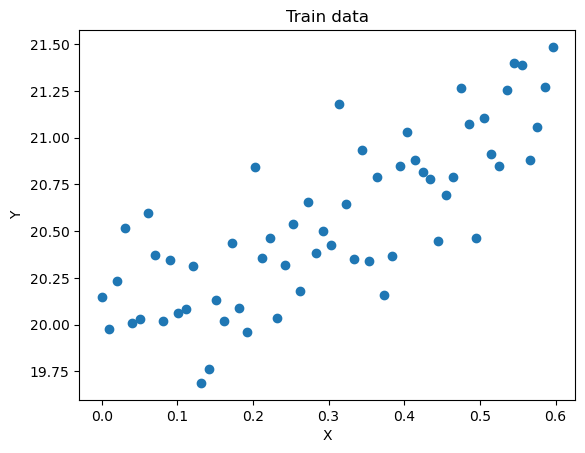

In [147]:
X_train, Y_train = extract_data(trainFileName)

plt.scatter(X_train, Y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train data')
plt.show()

In [148]:
def gradient_descent(X, Y, tolerance=1e-5, learning_rate=0.01, epochs=10000):
    w0 = 0
    w1 = 0
    n = len(X)
    prev_loss = 0

    for i in range(epochs):
        y_pred = w0 + w1 * X

        grad_w0 = (2/n) * np.sum(y_pred - Y)
        grad_w1 = (2/n) * np.sum((y_pred - Y) * X)

        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1

        loss = np.sqrt(np.mean((Y - y_pred) ** 2))  # mean squared error

        print(f'Epoch {i}: w0={w0}, w1={w1}, loss={loss}')

        if np.abs(prev_loss - loss) < tolerance:
            print(f'Precision reached at epoch {i}')
            break
        prev_loss = loss

    return w0, w1

In [149]:
def plot_regression_line(X_train, y_train, X_test, y_test, w0, w1):
    plt.scatter(X_train, y_train, color='blue', label='train Data')
    plt.scatter(X_test, y_test, color='red', label='test Data')

    x_values = np.linspace(min(X_train.min(), X_test.min()), max(
        X_train.max(), X_test.max()))  # plot regression line
    y_values = w0 + w1 * x_values
    plt.plot(x_values, y_values, color='green', label='Regression Line')

    plt.title('Linear Regression')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

Epoch 0: w0=0.41099126382076906, w1=0.12367813465364869, loss=20.554255079783534
Epoch 1: w0=0.8130256306535505, w1=0.24461160240278607, loss=20.106153908113985
Epoch 2: w0=1.2062985955438985, w1=0.3628603365917162, loss=19.667844933907123
Epoch 3: w0=1.59100138645794, w1=0.4784829623813285, loss=19.239114665838724
Epoch 4: w0=1.967321057420207, w1=0.5915368253029152, loss=18.81975427761025
Epoch 5: w0=2.3354405796185445, w1=0.7020780191887422, loss=18.409559506230345
Epoch 6: w0=2.6955389305204642, w1=0.8101614134929777, loss=18.00833055251852
Epoch 7: w0=3.0477911810443508, w1=0.9158406800162845, loss=17.615871983782508
Epoch 8: w0=3.392368580827974, w1=1.019168319047094, loss=17.231992638621932
Epoch 9: w0=3.7294386416358423, w1=1.120195684932291, loss=16.85650553381184
Epoch 10: w0=4.059165218946015, w1=1.2189730110897676, loss=16.489227773220737
Epoch 11: w0=4.381708591756117, w1=1.3155494344750247, loss=16.12998045871875
Epoch 12: w0=4.697225540647417, w1=1.409973019513739, loss=

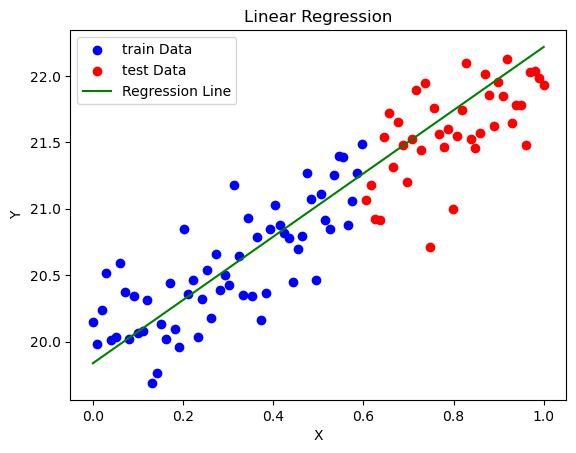

In [150]:
X_train, Y_train = extract_data(trainFileName)
X_test, Y_test = extract_data(testFileName)

w0, w1 = gradient_descent(X_train, Y_train)

y_pred_test = w0 + w1 * X_test
test_loss = np.sqrt(np.mean((Y_test - y_pred_test) ** 2))
print(f'Loss on test data: {test_loss}')

plot_regression_line(X_train, Y_train, X_test, Y_test, w0, w1)